In [6]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Linear Regression model 

In [7]:
class LinearRegression:
    """
    Multiple Linear Regression Model
    
    Model: y = w1*x1 + w2*x2 + ... + wn*xn + b
    
    Parameters:
    -----------
    n_features : int
        Number of input features
    weights : np.ndarray, optional
        Initial weights of shape (n_features,). If None, weights are randomly initialized.
    bias : float, optional
        Initial bias term. If None, bias is randomly initialized. Set to False to disable bias.
    random_state : int, optional
        Random seed for reproducibility
    """
    
    def __init__(self, n_features, weights = None, bias=None , random_state=42):
        self.n_features = n_features
        self.random_state = random_state
        np.random.seed(self.random_state)
        if weights is not None:
            if weights.shape != (n_features,):
                raise ValueError(f"Weights shape must be ({n_features},), got {weights.shape}")
            self.weights = np.array(weights)
        else:
            limit = np.sqrt(1.0 / n_features)
            self.weights = np.random.uniform(-limit, limit, size=n_features)
        
        if bias is not None:
            self.bias = bias
        else:
            self.bias = 0
    
    def set_weights(self, weights, bias=None):
        """
        Set new weights and optionally bias
        
        Parameters:
        -----------
        weights : np.ndarray
            New weights of shape (n_features,)
        bias : float, optional
            New bias value. If None, bias remains unchanged.
        """
        weights = np.array(weights)
        if self.weights.shape != weights.shape:
            raise ValueError(f"Weights shape must be ({self.n_features},), got {weights.shape}")
        
        self.weights = weights.copy()
        if bias is not None:
            self.bias = bias
        else:
            self.bias = np.random.uniform(-0.1, 0.1)
    
    def get_weights(self):
        """
        Get current weights and bias
        
        Returns:
        --------
        tuple
            (weights, bias) where weights is np.ndarray of shape (n_features,)
        """
        return self.weights.copy(), self.bias
    
    def predict(self, X):
        """
        Make prediction for input features
        
        Parameters:
        -----------
        X : np.ndarray
            Input features of shape (m_samples, n_features)
        
        Returns:
        --------
        np.ndarray
            Predicted values of shape (n_samples,)
        """

        if X.ndim == 1:
            X = X.reshape(1, -1)
        if X.shape[1] != self.weights.shape[0]:
            raise ValueError(f"Feature count mismatch: Expected {self.weights.shape[0]} features (columns), but input X has {X.shape[1]}.")
        
        prediction = np.dot(X, self.weights) + self.bias
        return prediction

    def train(self, X, y, iterations, learning_rate):
        """
        train the model and updates the weights and bias

        Parameters:
        -----------
        X : np.ndarray
            Input features of shape (m_samples, n_features)
        y : np.ndarray
            actual target values of shape (m_samples,)
        iterations : int
            number of iterations for training loop
        learing_rate : float
            by how much should the model learn
        """

        m, n = X.shape
        loss_history = []  # Store losses
        # Create a progress bar object
        pbar = tqdm(range(iterations), desc="Training Linear Regression")

        for epoch in pbar:
            # making the prediction
            prediction = self.predict(X)

            # calculating the loss
            MSE = np.mean((y - prediction) ** 2)

            # calculating the gradient
            error = prediction - y
            dl_db = np.mean(error)
            dl_dw = X.T @ error / m

            # updating the weights and bias
            self.weights = self.weights - learning_rate * dl_dw
            self.bias = self.bias - learning_rate * dl_db

            loss_history.append(MSE)
            # Update the progress bar with the current loss
            pbar.set_postfix({"MSE": f"{MSE:.4f}", "w_norm": f"{np.linalg.norm(self.weights):.2f}"})

        return loss_history


### testing if the model is created or not

In [8]:
if __name__ == "__main__":
    print("Example 1: Model with random initialization")
    model1 = LinearRegression(n_features=3, random_state=42)
    print(model1)
    print(f"Weights: {model1.weights}")
    print(f"Bias: {model1.bias}")
    
    # Make a prediction
    X = np.array([[1.0, 2.0, 3.0], [2.0, 3.0, 4.0]])
    prediction = model1.predict(X)
    print(f"Prediction for X={X}: {prediction}\n")
    
    print("Example 2: Model with custom weights and bias")
    custom_weights = np.array([0.5, 1.0, 1.5])
    model2 = LinearRegression(n_features=3, weights=custom_weights, bias=2.0)
    print(model2)
    prediction = model2.predict(X)
    print(f"Prediction for X={X}: {prediction}\n")
    
    print("Example 3: Update weights")
    new_weights = np.array([2.0, 3.0, 4.0])
    model1.set_weights(new_weights, bias=5.0)
    print("After updating weights:")
    print(model1)
    weights, bias = model1.get_weights()
    print(f"Retrieved weights: {weights}, bias: {bias}")


Example 1: Model with random initialization
Weights: [-0.14486859  0.52044005  0.26788353]
Bias: 0
Prediction for X=[[1. 2. 3.]
 [2. 3. 4.]]: [1.6996621  2.34311709]

Example 2: Model with custom weights and bias
Prediction for X=[[1. 2. 3.]
 [2. 3. 4.]]: [ 9. 12.]

Example 3: Update weights
After updating weights:
Retrieved weights: [2. 3. 4.], bias: 5.0


### testing the train function 

In [9]:
def function(X):
    m, n = X.shape
    y = []
    np.random.seed(42)
    w = np.random.random(n)
    b = np.random.random()

    for i in range(m):
        y.append(np.sum(X[i] * w) + b)

    y = np.array(y)

    return y, w, b


Training Linear Regression: 100%|██████████| 20000/20000 [00:05<00:00, 3363.93it/s, MSE=0.0000, w_norm=1.41]


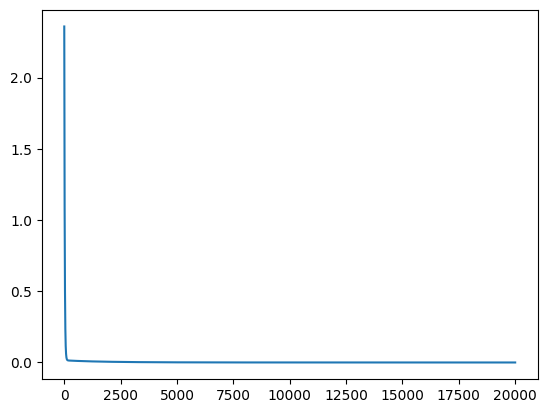

In [16]:
np.random.seed(42)
X = np.random.random((40,6))
y, w, b = function(X)


model = LinearRegression(X.shape[1])
losses = model.train(X, y, iterations=20000, learning_rate=0.01)
plt.plot(losses)  

In [17]:
weights, bias = model.get_weights()

print("--- Model Parameter Comparison ---")
print("==================================")

# 1. True Parameters (The Target)
print("TRUE PARAMETERS (W, b):")
print(f"  True Weights (W): \n{w}") 
print(f"  True Bias (b): {b:.4f}") 

print("----------------------------------")

# 2. Learned Parameters (The Result)
print("LEARNED PARAMETERS (weights, bias):")
print(f"  Learned Weights (w): \n{weights}")
print(f"  Learned Bias (bias): {bias:.4f}")

print("==================================")

--- Model Parameter Comparison ---
TRUE PARAMETERS (W, b):
  True Weights (W): 
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452]
  True Bias (b): 0.0581
----------------------------------
LEARNED PARAMETERS (weights, bias):
  Learned Weights (w): 
[0.37295613 0.94973129 0.73084753 0.59742774 0.15554661 0.15564861]
  Learned Bias (bias): 0.0609
